In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
X = data["data"].copy()[ :, 2:4]# 2 columns to allow straightforward decision boundary visualization
y = data["target"].copy()

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

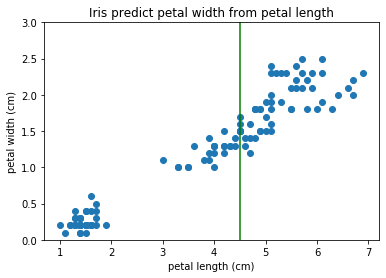

In [10]:
plt.scatter(X_train[:, 0], X_train[:, 1])#, c=y_train)
plt.plot([X_test[1,0],X_test[1,0]],[0,3],c="green")
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Iris predict petal width from petal length")
plt.ylim(0,3)
plt.savefig("irisPredictPetalWidth1.png",bbox_inches='tight')
plt.show()

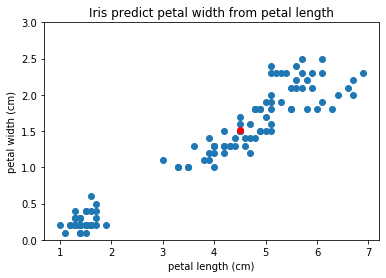

In [114]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train[:, 0].reshape(-1,1), X_train[:, 1])
pointPoss1 = lin_reg.predict(X_test[:, 0].reshape(-1, 1))

plt.scatter(X_train[:, 0], X_train[:, 1])#, c=y_train)
plt.scatter([X_test[1,0]],[pointPoss1[1]],c="red")
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Iris predict petal width from petal length")
plt.ylim(0,3)
plt.savefig("irisPredictPetalWidth2.png",bbox_inches='tight')
plt.show()

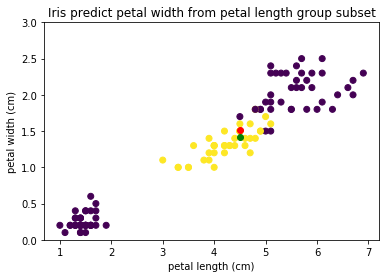

In [115]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train[y_train==1][:, 0].reshape(-1,1), X_train[y_train==1][:, 1])
pointPoss = lin_reg.predict(X_test[y_test==1][:, 0].reshape(-1, 1))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train==1)
plt.scatter([X_test[1,0]],[pointPoss1[1]],c="red")
plt.scatter([X_test[1,0]],[pointPoss[0]],c="green")
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Iris predict petal width from petal length group subset")
plt.ylim(0,3)
plt.savefig("irisPredictPetalWidth3.png",bbox_inches='tight')
plt.show()

In [50]:
x_t = np.linspace(1,7,100)
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_train[y_train==0][:, 0].reshape(-1,1),X_train[y_train==0][:, 1])
preds_1 = lin_reg_1.predict(x_t.reshape(-1,1))
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train[y_train==1][:, 0].reshape(-1,1),X_train[y_train==1][:, 1])
preds_2 = lin_reg_2.predict(x_t.reshape(-1,1))
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_train[y_train==2][:, 0].reshape(-1,1),X_train[y_train==2][:, 1])
preds_3 = lin_reg_3.predict(x_t.reshape(-1,1))

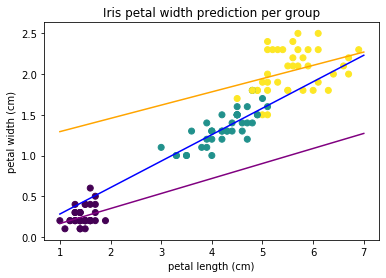

In [116]:
plt.title("Iris petal width prediction per group")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.plot(x_t, preds_1, c="purple")
plt.plot(x_t, preds_2, c="blue")
plt.plot(x_t, preds_3, c="orange")
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.savefig("irisPredictPetalWidth4.png",bbox_inches='tight')
plt.show()

In [27]:
lin_reg_2.intercept_

array([ 0.30610156,  0.15852585, -0.81351216])

In [42]:
y_data_train

array([[0.3, 0. , 0. ],
       [0.2, 0. , 0. ],
       [0.2, 0. , 0. ],
       [0.2, 0. , 0. ],
       [0. , 1.2, 0. ],
       [0.1, 0. , 0. ],
       [0. , 0. , 1.8],
       [0. , 0. , 2.1],
       [0. , 1.5, 0. ],
       [0. , 0. , 1.8],
       [0. , 0. , 1.8],
       [0. , 1.3, 0. ],
       [0.4, 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 2.3],
       [0. , 0. , 2.3],
       [0.1, 0. , 0. ],
       [0. , 1.3, 0. ],
       [0. , 1.6, 0. ],
       [0.2, 0. , 0. ],
       [0. , 0. , 2.2],
       [0.2, 0. , 0. ],
       [0.2, 0. , 0. ],
       [0. , 0. , 2.4],
       [0. , 0. , 2.1],
       [0. , 1.1, 0. ],
       [0. , 1.1, 0. ],
       [0.4, 0. , 0. ],
       [0. , 0. , 2.4],
       [0. , 0. , 1.8],
       [0. , 1.6, 0. ],
       [0. , 1.4, 0. ],
       [0.4, 0. , 0. ],
       [0. , 0. , 2. ],
       [0. , 0. , 1.8],
       [0. , 1.3, 0. ],
       [0. , 0. , 2. ],
       [0. , 1. , 0. ],
       [0. , 0. , 2.2],
       [0. , 1.5, 0. ],
       [0. , 1.3, 0. ],
       [0. , 1.2

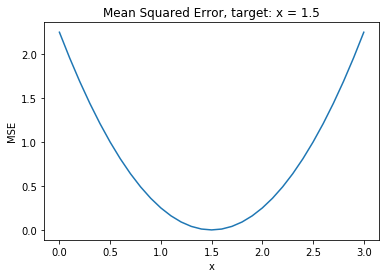

In [58]:
x = np.linspace(0,3,31)
y = np.power(x-1.5,2)
plt.plot(x,y)
plt.title("Mean Squared Error, target: x = 1.5")
plt.xlabel("x")
plt.ylabel("MSE")
plt.savefig("msePlot.png", bbox_inches='tight')

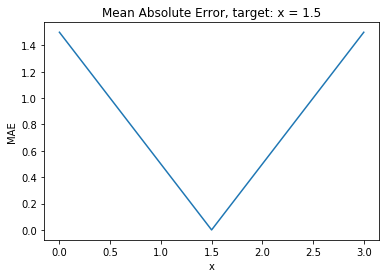

In [59]:
x = np.linspace(0,3,31)
y = np.abs(x-1.5)
plt.plot(x,y)
plt.title("Mean Absolute Error, target: x = 1.5")
plt.xlabel("x")
plt.ylabel("MAE")
plt.savefig("maePlot.png", bbox_inches='tight')

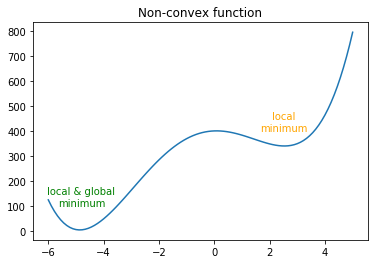

In [113]:
x2 = np.linspace(-6,5,100)
y = np.power(x2,4)+3*np.power(x2,3)-25*np.power(x2,2)+4*x2
plt.plot(x2,y+400)
plt.title("Non-convex function")
plt.text(x=2.5,y=0+400,ha="center",s="local\nminimum",c="orange")
plt.text(x=-4.8,y=-300+400,ha="center",s="local & global\nminimum",c="green")
plt.savefig("nonConvexFunction.png", bbox_inches='tight')
plt.show()